### Import Library

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Load Datasets

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [19]:
def image_plot(image, label, index):
    plt.figure(figsize=(15,3))
    plt.imshow(image[index])
    plt.xlabel(label[index])

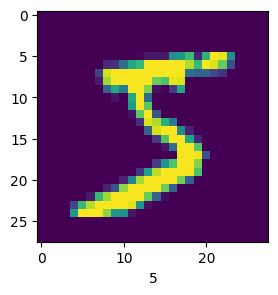

In [23]:
image_plot(x_train, y_train, 0)

### Normalize Data
This steps will divide image matrix by 255. Because x_train or x_test is on numpy format, it can be divided like below.

In [25]:
x_train = x_train / 255
x_test = x_test / 255

### Reshape Image from Datasets
This steps is required because mnist datasets from keras should be flattened to support CNN process

In [53]:
x_train_flattened = x_train.reshape(-1, 28, 28, 1)
x_test_flattened = x_test.reshape(-1, 28, 28, 1)

x_train_flattened.shape

(60000, 28, 28, 1)

### Creating Model

In [61]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile( optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5796 - loss: 1.2204
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9241 - loss: 0.2516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9521 - loss: 0.1604
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9634 - loss: 0.1235
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9698 - loss: 0.0977
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9730 - loss: 0.0879
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0700
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0657
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0569


In [62]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9776 - loss: 0.0699


[0.058554403483867645, 0.9814000129699707]

In [68]:
label_predicted = model.predict(x_test)
label_predicted = [np.argmax(i) for i in label_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


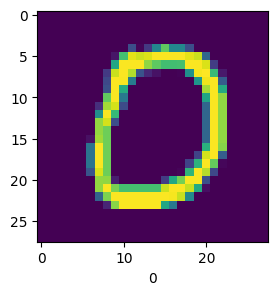

In [71]:
image_plot(x_test, y_test, 10)

In [72]:
label_predicted[10]

0